In [1]:
# Blinkit-Style Sales Prediction Dashboard
print("Blinkit-Style Sales Prediction — Assignment Solution")


Blinkit-Style Sales Prediction — Assignment Solution


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
BLINKIT_YELLOW = "#FFDD00"
BLINKIT_GREEN = "#00A651"
BLINKIT_DARKGREEN = "#008C3A"

sns.set_style("whitegrid")

plt.rcParams['axes.prop_cycle'] = plt.cycler(
    color=[BLINKIT_GREEN, BLINKIT_YELLOW, BLINKIT_DARKGREEN]
)

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = BLINKIT_DARKGREEN
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'




In [4]:
np.random.seed(42)

rows = 1500

df = pd.DataFrame({
    "outlet_type": np.random.choice(["Supermarket", "Grocery Store", "Hypermarket"], rows),
    "outlet_size": np.random.choice(["Small", "Medium", "Large"], rows),
    "item_category": np.random.choice(["Food", "Beverage", "Household", "Personal Care"], rows),
    "location": np.random.choice(["Tier 1", "Tier 2", "Tier 3"], rows),
    "sales": np.random.normal(5000, 1500, rows).clip(500, 15000)
})

df.head()


,outlet_type,outlet_size,item_category,location,sales
0,Hypermarket,Large,Beverage,Tier 3,6703.430221
1,Supermarket,Large,Beverage,Tier 3,3340.559731
2,Hypermarket,Small,Personal Care,Tier 3,3763.228758
3,Hypermarket,Small,Household,Tier 3,4087.115415
4,Supermarket,Small,Household,Tier 1,4206.533438


In [5]:
print("Dataset Shape:", df.shape)
df.describe(include="all")


Dataset Shape: (1500, 5)


,outlet_type,outlet_size,item_category,location,sales
count,1500,1500,1500,1500,1500.000000
unique,3,3,4,3,NaN
top,Supermarket,Small,Food,Tier 3,NaN
freq,520,516,392,512,NaN
mean,NaN,NaN,NaN,NaN,4928.118192
std,NaN,NaN,NaN,NaN,1523.911827
min,NaN,NaN,NaN,NaN,500.000000
25%,NaN,NaN,NaN,NaN,3892.421503
50%,NaN,NaN,NaN,NaN,4949.533834
75%,NaN,NaN,NaN,NaN,5904.699333


In [6]:
required_cols = ['outlet_type', 'outlet_size', 'item_category', 'location', 'sales']

for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

print("All required columns present.")


All required columns present.


In [7]:
print("Missing values before:\n", df.isna().sum())

df = df.fillna({
    "outlet_type": "Unknown",
    "outlet_size": "Medium",
    "item_category": "Unknown",
    "location": "Unknown",
})

df["sales"] = df["sales"].fillna(df["sales"].median())

print("\nMissing values after:\n", df.isna().sum())


Missing values before:
 outlet_type      0
outlet_size      0
item_category    0
location         0
sales            0
dtype: int64

Missing values after:
 outlet_type      0
outlet_size      0
item_category    0
location         0
sales            0
dtype: int64


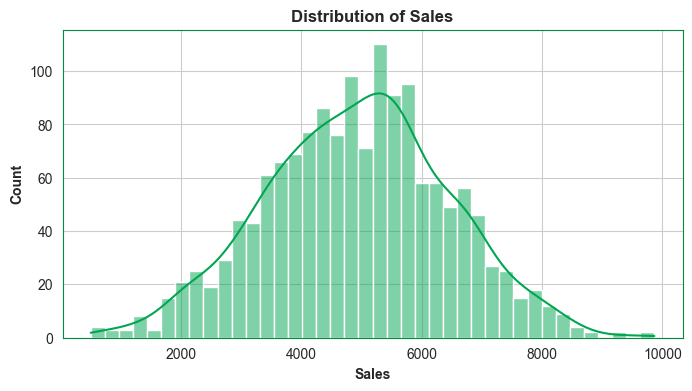

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(df["sales"], bins=40, kde=True, color=BLINKIT_GREEN)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.show()


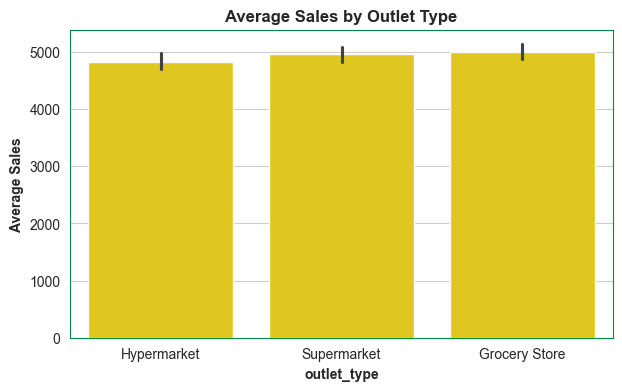

In [9]:
plt.figure(figsize=(7,4))
sns.barplot(
    x="outlet_type", 
    y="sales", 
    data=df, 
    estimator=np.mean, 
    color=BLINKIT_YELLOW
)
plt.title("Average Sales by Outlet Type")
plt.ylabel("Average Sales")
plt.show()


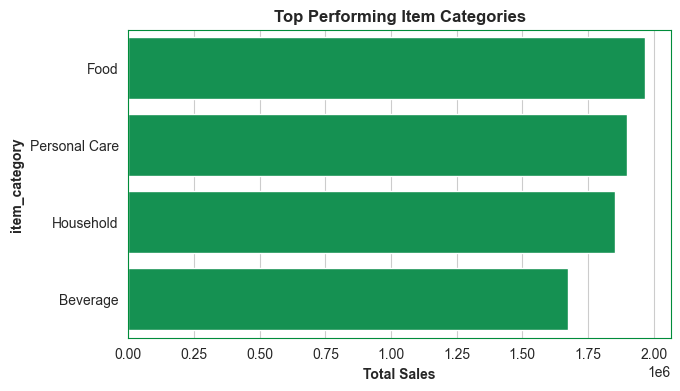

In [10]:
cat_sales = df.groupby("item_category")["sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(
    x=cat_sales.values, 
    y=cat_sales.index, 
    color=BLINKIT_GREEN
)
plt.title("Top Performing Item Categories")
plt.xlabel("Total Sales")
plt.show()


In [11]:
X = df.drop("sales", axis=1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train rows:", X_train.shape)
print("Test rows:", X_test.shape)


Train rows: (1200, 4)
Test rows: (300, 4)


In [12]:
categorical_cols = ["outlet_type", "outlet_size", "item_category", "location"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)


In [13]:
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
lr_pred = lr_pipeline.predict(X_test)


In [14]:
dt_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

dt_pipeline.fit(X_train, y_train)
dt_pred = dt_pipeline.predict(X_test)


In [15]:
def evaluate(y_true, y_pred):
    return {
        "MAE": round(mean_absolute_error(y_true, y_pred),2),
        "RMSE": round(mean_squared_error(y_true, y_pred, squared=False),2),
        "R2": round(r2_score(y_true, y_pred),3)
    }


In [17]:
# Corrected evaluation function (compute RMSE manually)
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)   # returns MSE
    rmse = float(np.sqrt(mse))
    r2 = r2_score(y_true, y_pred)
    return {"MAE": round(mae, 2), "RMSE": round(rmse, 2), "R2": round(r2, 3)}

# Build results dict and show as DataFrame
results = {
    "Linear Regression": evaluate(y_test, lr_pred),
    "Decision Tree": evaluate(y_test, dt_pred)
}

metrics_df = pd.DataFrame(results).T
metrics_df


,MAE,RMSE,R2
Linear Regression,1249.99,1565.79,-0.011
Decision Tree,1294.92,1610.72,-0.070


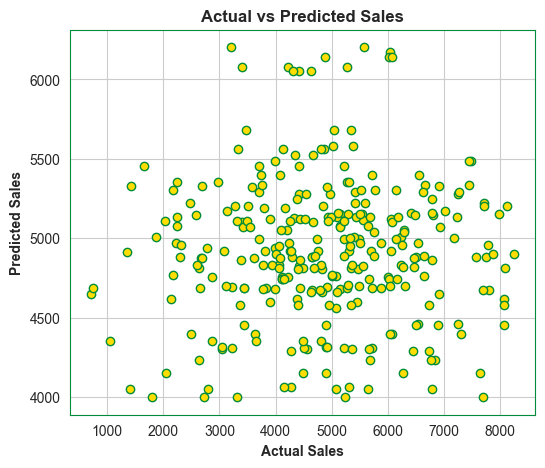

In [18]:
best_pred = dt_pred  # Using Decision Tree for comparison

plt.figure(figsize=(6,5))
plt.scatter(y_test, best_pred, color=BLINKIT_YELLOW, edgecolor=BLINKIT_DARKGREEN)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [19]:
sample = pd.DataFrame({
    "outlet_type": ["Supermarket"],
    "outlet_size": ["Medium"],
    "item_category": ["Food"],
    "location": ["Tier 1"]
})

prediction = dt_pipeline.predict(sample)[0]
print("Predicted Sales:", round(prediction,2))


Predicted Sales: 4453.55
